# Clasificación tesina CIDE 




**Factores qeu utiliza Torche para la on¡btención de indices economicos**

personal computer, stove, washing machine, refrigerator, cellular phone, landline phone, internet access, 
inside toilet, electricity, domestic service, cable or satellite TV, shop or business, land or farm, secondresidence, 
animals, agricultural machinery or equipment, savings account, checking account, credit card, and cars.

Paht recomendado https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html


# Limpiamos los datos  

In [1]:
#conda list
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#df1 = pd.read_stata('Datos/ESRU-EMOVI-2017/ESRU-EMOVI-2017-Entrevistado.dta', iterator = True)
# df1.variable_labels()
# df1.values.labels()
df = pd.read_stata('Datos/ESRU-EMOVI-2017/ESRU-EMOVI-2017-Entrevistado.dta',      
convert_categoricals= False)
df.dtypes
df

,folio,Estado,folio_ageb,consecutivo,Origen,Latitud,Longitud,LatitudGP,LongitudGP,recontacto,...,region,cdmx,tot_int,rururb,cmo1_2,cmo2_2,cmo3_2,cmo4_2,cmo5_2,tamhog
0,0100100010286020830102,1.0,0100100010286,1,1.0,21.901323,-102.310598,21.901477,-102.310429,2,...,3.0,NaN,5.0,0.0,41,.,.,13,.,5.0
1,0100100010286020850201,1.0,0100100010286,1,2.0,21.901323,-102.310598,21.900773,-102.311138,1,...,3.0,NaN,1.0,0.0,41,.,.,41,.,1.0
2,0100100010286025830201,1.0,0100100010286,1,1.0,21.900830,-102.311818,21.900549,-102.313361,1,...,3.0,NaN,2.0,0.0,81,.,.,11,.,2.0
3,0100100010286025840101,1.0,0100100010286,1,1.0,21.901188,-102.310700,21.900765,-102.313144,1,...,3.0,NaN,1.0,0.0,52,.,.,.,.,1.0
4,0100100010286025850101,1.0,0100100010286,1,2.0,21.901188,-102.310700,21.900577,-102.312733,1,...,3.0,NaN,2.0,0.0,52,.,.,.,.,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17660,3205700010022019460402,32.0,3205700010022,2,1.0,22.755409,-102.513985,22.755409,-102.513985,1,...,2.0,NaN,4.0,0.0,71,.,.,.,71,4.0
17661,3205700010022025450501,32.0,3205700010022,2,1.0,22.288405,-101.577532,22.288405,-101.577532,1,...,2.0,NaN,4.0,0.0,.,.,.,82,71,4.0
17662,3205700010022025460301,32.0,3205700010022,2,1.0,22.758625,-102.499375,22.758625,-102.499375,1,...,2.0,NaN,6.0,0.0,.,.,.,53,52,6.0
17663,3205700010022025460302,32.0,3205700010022,2,1.0,22.755420,-102.513997,22.755420,-102.513997,1,...,2.0,NaN,5.0,0.0,.,52,.,53,62,5.0


In [3]:

# escolaridad
#df.dropna(subset=['p13'])
#print(df['p13'].unique(), type(df[df.p13 != np.nan]['p13'].unique()[-1]) )
#l = 0
#for i in df['p13']:
#    if np.isnan(i):
#        df.loc[l,'p13']=1
#        l += 1
        
#print(df['p13'].unique(), type(df[df.p13 != np.nan]['p13'].unique()[-1]), np.isnan(df[df.p13 != np.nan]['p13'].unique()[-1]) )
#df

In [37]:
from sklearn.model_selection import train_test_split


# pregunta p02, comparten el mimso gasto para comer: 1 ) Si 2 ) No
df2 = df[df.p02 == 1 ]

# pregunta p08, es el jefe del hogar: 1 ) Si 
df2 = df2[df2.p08 == 1 ]

# pregunta p12. actualmente estudia, 1)Si 2)No
df2 = df2[df2.p12 == 2 ]

# aós alacnazado podria ser importante p14

# p13, nivel escuela 1-12. 97 = no fue a la escuela
#df2 = df2[df2.p13 = 97 ] # quitamos la no asistencia
#print(df2.p13.unique())


# p63, Escuela publica o privada, 8 = No aplica 
# estonces sino aplica con quedamos con el más alto 
# esta valirvale es mas complicada, por el momento no la utiizamos
# (preguntas por cada caso)



# p68, Personas que trabajan, 1. Si, 2. No
# p69, negocio vacaciones, 1. Si, 2. No
df2 = df2[(df2.p68 == 1) | (df2.p69 == 1)] # quitamos los no ocupados


# p120, material de la casa opciones: 1,2,3

# p121, numero de cuartos para dormir, libre

# p122, numeor totales de cuartos, libre

# p123, casa propia o  del conyugue, 1. Sí, 2. No 

# p125, servicios básicos de la vivienda, 
# 125a - 125e (preguntas por cada caso, 1. Si, 2. No)

# p126, articulos propiedad del hogar 
# 126a - 126r (preguntas por cada caso, 1. Si , 2. No)

# p127, prestamo variable 1-9, 8 es otro caso
#df2 = df2[df2.p127 != 8 ] # quitamos la otra posibilidad

# p128, ahorros, tarjeta de credito, cuent abancaria, 
# a-f (preguntas por cada caso) 1. Si 2. No

# p129, pertenencias propias o de conyugue, 
# a-e (pregunta por cada caso) 1. Si, 2. No

# p130, apoyo economico porgramas u otro medio, 
# a-f, (preguntas por cada caso)  

# p131, numero de automoviles propios, libre

# p132,  numero de miembros que aportan ingreso al hogar
df2 = df2[df2.p132 == 1] # un solo sosten

# Cohort  de ingreso todas las personas que aportan ingresos
df2 = df2[(df2.p133 != 8) & ( df2.p133 != 9) ] #ingreso no reportado o no diponible

print('valores cohort de ingreso',df2.p133.unique())


# p134, condiciones del barrio
# a-i, (preguntas por cada caso) 1. Si , 2. No, 8 son respuesta 
p = "p134"
for _ in "abcdefghi":
    df2 = df2[df2[p+_] != 8]


# p147 percepción de 1 más pobre + 10 más rico
    
    
#df2.p08.plot.hist()


#df2.p133.plot.hist()


p13  = ['p13']
p63 = ['p63a','p63b','p63c','p63d'] # por el momento la  quitamos de la estimación
p120  = ['p120']
p121  = ['p121']
p122  = ['p122']
p123  = ['p123']
p125 = ['p125a','p125b','p125c','p125d','p125e']
import string
p126 = ['p126' + i for i in string.ascii_lowercase[0:18] ]
p127 = ['p127']
p128 = ['p128a','p128b','p128c','p128d','p128e','p128f']
p129 = ['p129a','p129b','p129c','p129d','p129e']
p130 = ['p130a','p130b','p130c','p130d','p130e', 'p130f']
p131 = ['p131']
p132 = ['p132']
p134 = ['p134a','p134b','p134c','p134d','p134e', 'p134f','p134g','p134h','p134i']
p147 = ['p147']

indexX =  p13  +  p120  + p121 +  p122  + p123 + p125  + p126 + p127 + p128 + p129  + p130 + p131  

#indexX =  p13   + p121 +  p122 + p127 + p131 


#indexX =  p13  + p131 


indexY = ['p133']

M  = df2[indexX+indexY].dropna() 

M.loc[M.p133 == 2,'p133'] = 1
M.loc[M.p133 != 1,'p133'] = M.p133 - 1

#a = StandardScaler().fit(M)
#M_scaled = a.transform(M)
#M_sca = pd.DataFrame(M_scaled)
#M_sca.describe()


#ax = StandardScaler().fit(M[indexX])
#X = ax.transform(M[indexX])

X = M[indexX].to_numpy()
Xc = M[indexX].astype('category')
y = M[indexY].to_numpy()
yc = M[indexY].astype('category')
y = np.ravel(y)
y = y-1;

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2, random_state=0)

# dummies
X_train, X_test, y_train, y_test = train_test_split(pd.get_dummies(Xc), yc, test_size=0.2, random_state=21, stratify=yc)
y_train=y_train.to_numpy().ravel()
y_test=y_test.to_numpy().ravel()

print('valores unicos para claseificar',yc.p133.unique())
print('valores del entrenamiento',np.unique(y_train))
print('valores del test',np.unique(y_test))

valores cohort de ingreso [3 7 5 1 2 4 6]
valores unicos para claseificar [2, 6, 4, 1, 3, 5]
Categories (6, int64): [2, 6, 4, 1, 3, 5]
valores del entrenamiento [1 2 3 4 5 6]
valores del test [1 2 3 4 5 6]


# Clasificaciòn con Máquinas de soporte vectorial lineales

Glosario scikit-learn https://scikit-learn.org/stable/glossary.html#glossary

Documentación SVC https://scikit-learn.org/stable/modules/svm.html#classification


Documentación funcion lineal https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC




In [38]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

clas_linsvm = LinearSVC(max_iter = 3000, penalty = "l2",
                       loss = "squared_hinge", dual = True,
                       C = 0.01)

y_pred_linsvm = clas_linsvm.fit(X_train, y_train).predict(X_test)

accuracy = accuracy_score(y_test, y_pred_linsvm)
print('Accuracy: %.2f' % (accuracy*100))

# NO ganamos nada con categoricas
#y_pred_linsvmc = clas_linsvm.fit(Xc_train, yc_train).predict(Xc_test)

#accuracy = accuracy_score(yc_test, y_pred_linsvmc)
#print('Accuracy: %.2f' % (accuracy*100))




Accuracy: 44.19


## Visualización Maquinas lineales

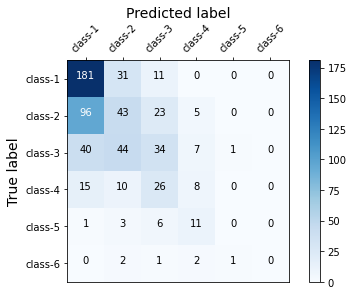

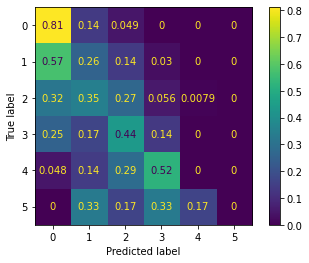

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools

def matrizviz(matrix):
    

    plt.clf()

    # place labels at the top
    plt.gca().xaxis.tick_top()
    plt.gca().xaxis.set_label_position('top')

    # plot the matrix per se
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    # plot colorbar to the right
    plt.colorbar()
    fmt = 'd'
    class_names = ['class-1','class-2','class-3','class-4','class-5', 'class-6']
    # write the number of predictions in each bucket
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        # if background is dark, use a white number, and vice-versa
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    plt.tight_layout()
    plt.ylabel('True label',size=14)
    plt.xlabel('Predicted label',size=14)
    plt.show()
        
matrix = confusion_matrix(y_test,y_pred_linsvm)
matrizviz(matrix)

matrix = confusion_matrix(y_test,y_pred_linsvm, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot() 

# Clasificación con vecinos

Documentación vecinos https://scikit-learn.org/stable/modules/neighbors.html

Documentación k-vecinos https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

Documentación R-vecinos https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsClassifier.html#sklearn.neighbors.RadiusNeighborsClassifier

Accuracy k vecinos: 42.69


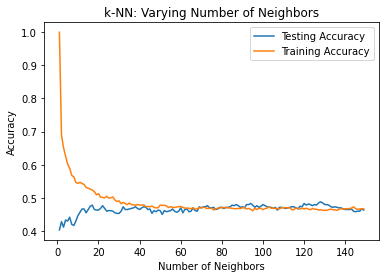

Accuracy r vecinos: 48.17
Accuracy centroide: 43.02
0.0 Accuracy centroide encogido: 43.02
0.25 Accuracy centroide encogido: 42.19
0.5 Accuracy centroide encogido: 41.69
0.75 Accuracy centroide encogido: 41.86
1.0 Accuracy centroide encogido: 41.36
0.3704318936877076
Accuracy combinado: 41.36
Accuracy combinado: 39.37


In [40]:
# clasifcación k vecinos

from sklearn.neighbors import KNeighborsClassifier

clas_neigk = KNeighborsClassifier(n_neighbors = 5, weights='distance',
                                leaf_size = 10, p = 2,
                                 algorithm = 'ball_tree')#'kd_tree')#'brute')

y_pred_neigk = clas_neigk.fit(X_train, y_train).predict(X_test)

# no obtenemos mejora ocn categoricas
accuracy = accuracy_score(y_test, y_pred_neigk)
print('Accuracy k vecinos: %.2f' % (accuracy*100))


### buscamos la cantidad vecinos mejor

neighbors = np.arange(1, 150)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k, algorithm='brute')

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()







# clasificacion r-vecinos

from sklearn.neighbors import RadiusNeighborsClassifier


clas_neigr = RadiusNeighborsClassifier(radius = 4, weights='distance',
                                leaf_size = 10, p = 2,
                            outlier_label = 'most_frequent',
                                algorithm =  'ball_tree')#'kd_tree')#'brute')

y_pred_neigr = clas_neigr.fit(X_train, y_train).predict(X_test)


accuracy = accuracy_score(y_test, y_pred_neigr)
print('Accuracy r vecinos: %.2f' % (accuracy*100))




# clasifiacion centroide más cercano

from sklearn.neighbors import NearestCentroid

clas_neigc = NearestCentroid(shrink_threshold = 0.01)

y_pred_neigc= clas_neigc.fit(X_train, y_train).predict(X_test)

accuracy = accuracy_score(y_test, y_pred_neigc)
print('Accuracy centroide: %.2f' % (accuracy*100))



# clasifiacion con centoide encogido

for shrinkage in np.linspace(0, 1.0, num=5):
    
    clas_neigce = NearestCentroid(shrink_threshold=shrinkage)
    y_pred_neigce = clas_neigce.fit(X_train, y_train).predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_neigce)
    print(shrinkage,'Accuracy centroide encogido: %.2f' % (accuracy*100))

# Tranformación de vecinos orehecho
from sklearn.manifold import Isomap
from sklearn.neighbors import KNeighborsTransformer
from sklearn.pipeline import make_pipeline
clas_neigt = make_pipeline(
    KNeighborsTransformer(n_neighbors=5))

# NO jalo
#y_pred_neigt= clas_neigt.fit(X_train, y_train).predict(X_test)

#accuracy = accuracy_score(y_test, y_pred_neigt)
#print('Accuracy: %.2f' % (accuracy*100))




# clasifiacion con componentes de vecindad

from sklearn.neighbors import NeighborhoodComponentsAnalysis

nca = NeighborhoodComponentsAnalysis( max_iter = 100)
nca.fit(X_train, y_train)

clas_neigk.fit(X_train, y_train)


print(clas_neigk.score(nca.transform(X_test), y_test))


# clasificaciñon combianndo el anterior con el primero
from sklearn.pipeline import Pipeline

nca = NeighborhoodComponentsAnalysis(random_state=42, max_iter = 100)
nca_pipe = Pipeline([('nca', nca), ('knn', clas_neigk)])
nca_pipe.fit(X_train, y_train)

y_pred_nca = nca_pipe.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_nca)
print('Accuracy combinado: %.2f' % (accuracy*100))
#print(nca_pipe.score(X_test, y_test))




# clasificaciñon combianndo nca con  cpmponentes reducidas y el primero
from sklearn.pipeline import Pipeline

nca = NeighborhoodComponentsAnalysis(random_state=42, max_iter = 100,
                                    n_components=2)
nca_pipe = Pipeline([('nca', nca), ('knn', clas_neigk)])
nca_pipe.fit(X_train, y_train)

y_pred_nca = nca_pipe.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_nca)
print('Accuracy combinado: %.2f' % (accuracy*100))
#print(nca_pipe.score(X_test, y_test))


# Clasificación con Maquinas de soporte vectorial (no lineales)

Docuemntación SVM https://scikit-learn.org/stable/modules/svm.html#classification

In [41]:
# Soporte no lineal
from sklearn.svm import SVC

clas_nlinsvm = SVC(max_iter = -1, C = 1,
                  kernel = 'rbf', gamma = 'auto')

y_pred_nlinsvm = clas_nlinsvm.fit(X_train, y_train).predict(X_test)

accuracy = accuracy_score(y_test, y_pred_nlinsvm)
print('Accuracy SVM no lineal : %.2f' % (accuracy*100))



# Sopoete no luenal con escalamiento
from sklearn.preprocessing import StandardScaler

clas_nelinsvm =  make_pipeline(StandardScaler(), SVC(max_iter = -1, C = 1,
                  kernel = 'rbf',gamma='auto'))

y_pred_nelinsvm = clas_nelinsvm.fit(X_train, y_train).predict(X_test)

accuracy = accuracy_score(y_test, y_pred_nelinsvm)
print('Accuracy SVM no lineal datos escalados: %.2f' % (accuracy*100))




# Soporte vectorial en busqueda de parametros

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
X_trainsvmp = scaler.fit_transform(X_train)

C_range = np.logspace(-2, 3, 13)
gamma_range = np.logspace(-9, 3, 13)

#param_grid = dict(gamma=gamma_range, C=C_range)
#cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
#grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
#grid.fit(X_trainsvmp, y_train)

#print("The best parameters are %s with a score of %0.2f"
#      % (grid.best_params_, grid.best_score_))

# The best parameters 
# are {'C': 1.2115276586285888, 'gamma': 0.01} with a score of 0.37



# Soporte no lineal con los parametros ajustados

from sklearn.svm import SVC

clas_nlinsvmpa = SVC(max_iter = -1, C = 1.2115,
                  kernel = 'rbf', gamma = 0.01)

y_pred_nlinsvmpa = clas_nlinsvmpa.fit(X_train, y_train).predict(X_test)

accuracy = accuracy_score(y_test, y_pred_nlinsvmpa)
print('Accuracy SVM no lineal para ajustdos: %.2f' % (accuracy*100))




# Soporte no lineal con los parametros ajustados y pesos

from sklearn.svm import SVC

clas_nlinsvmpap = SVC(max_iter = -1, C = 1.2115,
                  kernel = 'rbf', gamma = 0.01,
                     class_weight={1: 500, 2:100})

y_pred_nlinsvmpap = clas_nlinsvmpap.fit(X_train, y_train).predict(X_test)

accuracy = accuracy_score(y_test, y_pred_nlinsvmpap)
print('Accuracy SVM no lineal para ajus pesados : %.2f' % (accuracy*100))



# reporte de la clasificación

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_nlinsvm ))


# Datos escalados u parametros ajustados

clas_nlsvmpae =  make_pipeline(StandardScaler(), 
                               SVC(max_iter = -1, C = 1.2115,
                  kernel = 'rbf', gamma = 0.01))

y_pred_nlsvmpae = clas_nlsvmpae.fit(X_train, y_train).predict(X_test)

accuracy = accuracy_score(y_test, y_pred_nlsvmpae)
print('Accuracy SVM no lineal datos escalados y ajustados: %.2f' % (accuracy*100))



Accuracy SVM no lineal : 46.01
Accuracy SVM no lineal datos escalados: 46.01
Accuracy SVM no lineal para ajustdos: 45.18
Accuracy SVM no lineal para ajus pesados : 39.70
              precision    recall  f1-score   support

           1       0.55      0.81      0.65       223
           2       0.35      0.27      0.30       167
           3       0.36      0.38      0.37       126
           4       0.33      0.07      0.11        59
           5       0.00      0.00      0.00        21
           6       0.00      0.00      0.00         6

    accuracy                           0.46       602
   macro avg       0.27      0.25      0.24       602
weighted avg       0.41      0.46      0.42       602



/Users/rafamtz/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy SVM no lineal datos escalados y ajustados: 45.18


# Gradiente descendiente estocastico

Docuemntación https://scikit-learn.org/stable/modules/sgd.html#classification



In [42]:
# gradiente estocastigo

from sklearn.linear_model import SGDClassifier

clas_sgd = SGDClassifier(loss="hinge", alpha=0.01, max_iter=200)

y_pred_sgd = clas_sgd.fit(X_train, y_train).predict(X_test)

accuracy = accuracy_score(y_test, y_pred_sgd)
print('Accuracy sgd: %.2f' % (accuracy*100))



# gradiento estocastico con promedio

clas_sgda = SGDClassifier(loss="hinge", alpha=0.01, max_iter=200,
                        average=True)#, class_weight={1: 50,2:100,3:50})

y_pred_sgda = clas_sgda.fit(X_train, y_train).predict(X_test)

accuracy = accuracy_score(y_test, y_pred_sgda)
print('Accuracy sgd average: %.2f' % (accuracy*100))






Accuracy sgd: 44.52
Accuracy sgd average: 44.35


# Perceptron

Docuemntación perceptron https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron

Perceptron is a classification algorithm which shares the same underlying implementation with SGDClassifier. In fact, Perceptron() is equivalent to SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None).

In [43]:
from sklearn.linear_model import Perceptron

clas_per = Perceptron(tol=1e-3, random_state=0)

y_pred_per = clas_per.fit(X_train, y_train).predict(X_test)

accuracy = accuracy_score(y_test, y_pred_per)
print('Accuracy perceptron: %.2f' % (accuracy*100))

Accuracy perceptron: 40.86


# Clasificador Pasivo agresivo

docuemntación función https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PassiveAggressiveClassifier.html#sklearn.linear_model.PassiveAggressiveClassifier

In [44]:
from sklearn.linear_model import PassiveAggressiveClassifier

clas_pac = PassiveAggressiveClassifier(max_iter=1000, random_state=0,tol=1e-3)


y_pred_pac = clas_pac.fit(X_train, y_train).predict(X_test)

accuracy = accuracy_score(y_test, y_pred_pac)
print('Accuracy perceptron: %.2f' % (accuracy*100))

Accuracy perceptron: 39.37


 # Discrminante lineal y cuadratico
 
 Doceumntación https://scikit-learn.org/stable/modules/lda_qda.html
 

In [45]:
# discriminate lineal

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clas_dl = LinearDiscriminantAnalysis()

y_pred_dl = clas_dl.fit(X_train, y_train).predict(X_test)

accuracy = accuracy_score(y_test, y_pred_dl)
print('Accuracy perceptron: %.2f' % (accuracy*100))


# discriminante cuadratico
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clas_dc = QuadraticDiscriminantAnalysis()

y_pred_dc = clas_dl.fit(X_train, y_train).predict(X_test)

accuracy = accuracy_score(y_test, y_pred_dc)
print('Accuracy perceptron: %.2f' % (accuracy*100))

Accuracy perceptron: 44.19
Accuracy perceptron: 44.19


# Processos Gausianos

Docuemntación https://scikit-learn.org/stable/modules/gaussian_process.html

In [ ]:
# tarda mucho y es pobre en el uso más simple

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

kernel = 1.0 * RBF(1.0)
clas_gpc = GaussianProcessClassifier(kernel=kernel,random_state=0)

y_pred_gpc = clas_gpc.fit(X_train, y_train).predict(X_test)

accuracy = accuracy_score(y_test, y_pred_gpc)
print('Accuracy perceptron: %.2f' % (accuracy*100))


# Aproximación con kernel

documentación https://scikit-learn.org/stable/modules/kernel_approximation.html


In [46]:
from sklearn.kernel_approximation import RBFSampler

rbf_feature = RBFSampler(gamma=1, random_state=1)
Xtrain_features = rbf_feature.fit_transform(X_train)
clas_ak = SGDClassifier(loss="hinge", alpha=0.01, max_iter=200,
                        average=True)
Xtest_features = rbf_feature.fit_transform(X_test)

y_pred_ak = clas_ak.fit(Xtrain_features, y_train).predict(Xtest_features)

accuracy = accuracy_score(y_test, y_pred_ak)
print('Accuracy kernel: %.2f' % (accuracy*100))

Accuracy kernel: 32.89


# Bayes 

Docuemntación https://scikit-learn.org/stable/modules/naive_bayes.html

In [47]:
from sklearn.naive_bayes import GaussianNB

clas_nb = GaussianNB()

y_pred_nb = clas_nb.fit(X_train, y_train).predict(X_test)

accuracy = accuracy_score(y_test, y_pred_nb)
print('Accuracy bayes: %.2f' % (accuracy*100))

# multninomial bayes
from sklearn.naive_bayes import MultinomialNB

clas_mb = MultinomialNB()

y_pred_mb = clas_mb.fit(X_train, y_train).predict(X_test)

accuracy = accuracy_score(y_test, y_pred_mb)
print('Accuracy bayes multinomial: %.2f' % (accuracy*100))



# Bayes con complemento
from sklearn.naive_bayes import ComplementNB

clas_cb = ComplementNB()

y_pred_cb = clas_cb.fit(X_train, y_train).predict(X_test)

accuracy = accuracy_score(y_test, y_pred_cb)
print('Accuracy bayes complemento: %.2f' % (accuracy*100))

# Bayes categorico no jalo
#from sklearn.naive_bayes import CategoricalNB

#clas_cab = CategoricalNB()

#y_pred_cab = clas_cab.fit(Xc_train, yc_train).predict(Xc_test)

#accuracy = accuracy_score(y_test, y_pred_cab)
#print('Accuracy bayes categorico: %.2f' % (accuracy*100))


Accuracy bayes: 19.44
Accuracy bayes multinomial: 45.02
Accuracy bayes complemento: 42.86


# Ridge clasificación

Docuemnatación https://scikit-learn.org/stable/modules/linear_model.html#classification

In [48]:
from sklearn.linear_model import RidgeClassifier

clas_ridge = RidgeClassifier(max_iter = 100, normalize = True)

y_pred_ridge = clas_ridge.fit(X_train, y_train).predict(X_test)

accuracy = accuracy_score(y_test, y_pred_ridge)
print('Accuracy ridge: %.2f' % (accuracy*100))

Accuracy ridge: 46.01


# Regresión logistica

Docuemntación https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [49]:
# regresiónlogistica multinomial
from sklearn.linear_model import LogisticRegression

def logistica(X_train, y_train, X_test, y_test):
    y_pred_rlmulti = LogisticRegression(solver='saga', 
                                    max_iter=200, 
                                    random_state=42,
            multi_class='multinomial').fit(X_train, y_train).predict(X_test)

    accuracy = accuracy_score(y_test, y_pred_rlmulti)
    print('Accuracy reg log multi: %.2f' % (accuracy*100))


# regresión logistica ovr

    y_pred_rlovr = LogisticRegression(solver='liblinear', 
                                    max_iter=200, 
                                    random_state=42,
            multi_class='ovr').fit(X_train, y_train).predict(X_test)

    accuracy = accuracy_score(y_test, y_pred_rlovr)
    print('Accuracy reg log ovr: %.2f' % (accuracy*100))

logistica(X_train, y_train, X_test, y_test)

Accuracy reg log multi: 42.86
Accuracy reg log ovr: 43.52


/Users/rafamtz/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


# Clasificación con árboles y bosques

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def arbolbos(X_train, y_train, X_test, y_test):
    clas_tree = DecisionTreeClassifier()
    clas_forest = RandomForestClassifier( max_depth = 14,max_features=None, min_samples_leaf = 20)

    y_pred_tree = clas_tree.fit(X_train, y_train).predict(X_test)
    y_pred_forest = clas_forest.fit(X_train, y_train).predict(X_test)

    accuracy = accuracy_score(y_test, y_pred_forest)
    print('Accuracy bosque: %.2f' % (accuracy*100))

    accuracy = accuracy_score(y_test, y_pred_tree)
    print('Accuracy arbol: %.2f' % (accuracy*100))



#print(np.unique(y_test))
#y_pred_tree.shape
#y_pred_forest.shape
arbolbos(X_train, y_train, X_test, y_test)

Accuracy bosque: 48.17
Accuracy arbol: 35.22


In [51]:

validacion = pd.DataFrame({'Actual': y_test,'Predicción': y_pred_tree, 'Predicción F': y_pred_forest,
                          'Diferencia': y_test-y_pred_forest}) 
validacion
a = np.abs(y_test-y_pred_forest)
print(a.mean())

accuracy = accuracy_score(y_test, y_pred_forest)
print('Accuracy: %.2f' % (accuracy*100))

accuracy = accuracy_score(y_test, y_pred_tree)
print('Accuracy: %.2f' % (accuracy*100))



NameError: name 'y_pred_tree' is not defined

## Visualización de arboles y bósques

In [ ]:
matrix = confusion_matrix(y_test,y_pred_forest)

matrizviz(matrix)

# Selección de caracteristocas categoricas, arboles

Feature 0: 25.519800
Feature 1: 108.711163
Feature 2: 11.880578
Feature 3: 32.152880
Feature 4: 6.177532
Feature 5: 40.716014
Feature 6: 4.489261
Feature 7: 14.677559
Feature 8: 4.202263
Feature 9: 65.584601
Feature 10: 261.060678
Feature 11: 67.939123
Feature 12: 44.946701
Feature 13: 11.364445
Feature 14: 83.435585
Feature 15: 178.356949
Feature 16: 70.135098
Feature 17: 7.712334
Feature 18: 28.872737
Feature 19: 16.936367
Feature 20: 24.580539
Feature 21: 15.104391
Feature 22: 1.696529
Feature 23: 1.696529
Feature 24: 48.983848
Feature 25: 84.090381
Feature 26: 25.170867
Feature 27: 19.829039
Feature 28: 48.996006
Feature 29: 84.665285
Feature 30: 48.777592
Feature 31: 14.788724
Feature 32: 17.546279
Feature 33: 57.764930
Feature 34: 5.218401
Feature 35: 9.670118
Feature 36: 5.539864
Feature 37: 67.356275
Feature 38: 0.055396
Feature 39: 4.544388
Feature 40: 9.124198
Feature 41: 79.827498
Feature 42: 143.465401
Feature 43: 164.435388
Feature 44: 149.249905
Feature 45: 16.064617
Feat

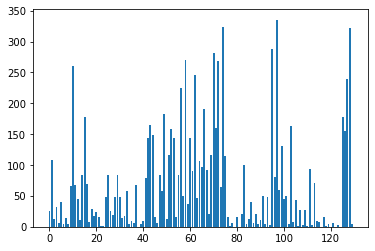

In [52]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k=40)
    #mutual_info_classif
    #chi2
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

## Visualización con selección 

Accuracy: 45.85


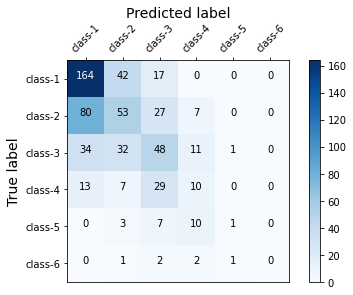

In [53]:

clas_forest_chi = RandomForestClassifier(max_depth = 14,max_features=None, min_samples_leaf = 20)

yhat =clas_forest_chi.fit(X_train_fs, y_train).predict(X_test_fs)

accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

matrix = confusion_matrix(y_test,yhat)

matrizviz(matrix)


# Encodig dummys arboles

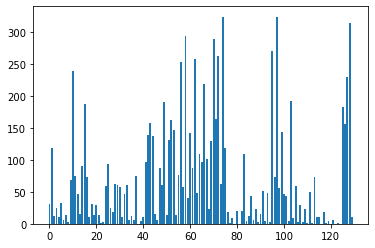

NameError: name 'clas_forest' is not defined

In [54]:
#from sklearn.preprocessing import OneHotEncoder
Xc_train, Xc_test, yc_train, yc_test = train_test_split(pd.get_dummies(Xc), yc, test_size=0.2, random_state=0)

Xc_train_fs, Xc_test_fs, fsc = select_features(Xc_train, yc_train.to_numpy().ravel(), Xc_test)
plt.bar([i for i in range(len(fsc.scores_))], fsc.scores_)
plt.show()

ypc_forest = clas_forest.fit(Xc_train, yc_train.to_numpy().ravel()).predict(Xc_test)

matrix = confusion_matrix(yc_test,ypc_forest)

matrizviz(matrix)

yhat =clas_forest_chi.fit(Xc_train_fs, yc_train.to_numpy().ravel()).predict(Xc_test_fs)

accuracy = accuracy_score(yc_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

matrix = confusion_matrix(yc_test,yhat)

matrizviz(matrix)
Xc_train_fs.shape

In [55]:
ypc_forest = clas_forest.fit(Xc_train, yc_train.to_numpy().ravel()).predict(Xc_test)

accuracy = accuracy_score(yc_test, ypc_forest)
print('Accuracy: %.2f' % (accuracy*100))

NameError: name 'clas_forest' is not defined

## Visualización con yellowbrick
    from  yellowbrick.classifier import ClassPredictionError

In [ ]:
#clases = ['a','aa','b','bb','c','cc','d']
#visualizer = ClassPredictionError(
#    RandomForestClassifier(max_depth = None, max_features=None, min_samples_leaf = 5), classes= clases)
#visualizer.fit(X_train, y_train)
#visualizer.score(X_test, y_test)
#visualizer.show()


# Clasificador con redes neuronales 

In [57]:
from sklearn.neural_network import MLPClassifier

#clas_mpl = MLPClassifier(random_state=1,hidden_layer_sizes=(100, 100, 100),
#                      solver='lbfgs',alpha = 1e-5, learning_rate = 'adaptive',
#                      max_iter=2000)

clf = MLPClassifier(solver='lbfgs', alpha=0.5, max_iter = 200,
                    hidden_layer_sizes=(10, 10, 10,10,10,10,10,10), random_state=1)

#y_pred_clas = clf.fit(X_train_fs, y_train).predict(X_test_fs)
y_pred_clas = clf.fit(X_train, y_train).predict(X_test)

AttributeError: 'str' object has no attribute 'decode'

## visualización redes neuronlaes

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_clas, normalize ='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot() 

accuracy = accuracy_score(y_test, y_pred_clas)
print('Accuracy: %.2f' % (accuracy*100))

# Metodos de ensamble

Es una combinación de varios entimadores dado un algoritmo de aprendizaje para mejprar la generalización /robustes, tres categorias

- Metodos de promedio. Tal cual hace el promedio, bagging methods, bosques aleatorios
- Bosting methods, son secuenciales u cada uno trata d reducir la desviación, AdaBoost, Gradient Tree Bossting

In [58]:
from sklearn.ensemble import BaggingClassifier


# con maquinas de soporte vectorial
clas_bsvc = BaggingClassifier(base_estimator=SVC(),
                        n_estimators=10, random_state=0)

y_pred_bsvc = clas_bsvc.fit(X_train, y_train).predict(X_test)

accuracy = accuracy_score(y_test, y_pred_bsvc)
print('Accuracy baggin con maquina: %.2f' % (accuracy*100))





# con k vecinos cercanos

clas_bkvecinos = BaggingClassifier(KNeighborsClassifier(),
                            max_samples=0.5, max_features=0.5)

y_pred_bkvecinos = clas_bkvecinos.fit(X_train, y_train).predict(X_test)

accuracy = accuracy_score(y_test, y_pred_bkvecinos)
print('Accuracy baggin con k vecinos: %.2f' % (accuracy*100))






# los randomforest es un metodo de ensambe





# extremadamente arboles aleatorios
from sklearn.ensemble import ExtraTreesClassifier


clas_etc = ExtraTreesClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)

y_pred_etc = clas_etc.fit(X_train, y_train).predict(X_test)

accuracy = accuracy_score(y_test, y_pred_etc)
print('Accuracy baggin con extra forest: %.2f' % (accuracy*100))






# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

clas_ada = AdaBoostClassifier(n_estimators=50)
y_pred_ada = clas_ada.fit(X_train, y_train).predict(X_test)

accuracy = accuracy_score(y_test, y_pred_ada)
print('Accuracy ada : %.2f' % (accuracy*100))






# Gradinte tree Boosting
from sklearn.ensemble import GradientBoostingClassifier
clas_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0)
y_pred_gb = clas_gb.fit(X_train, y_train).predict(X_test)

accuracy = accuracy_score(y_test, y_pred_gb)
print('Accuracy gb : %.2f' % (accuracy*100))
print(clas_gb.feature_importances_)





# hist gradiente
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

clas_hgb = HistGradientBoostingClassifier(max_iter=100).fit(X_train, y_train)
y_pred_hgb = clas_hgb.fit(X_train, y_train).predict(X_test)

accuracy = accuracy_score(y_test, y_pred_hgb)
print('Accuracy hgb : %.2f' % (accuracy*100))






# Voting Clasificador
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
    voting='soft')#'hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    
    
# se puede hacer lo mismo pero buscando el mejor parametro



#stakingclasifcador
from sklearn.ensemble import StackingClassifier
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', make_pipeline(StandardScaler(),
                          LinearSVC(random_state=42)))
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)
clf.fit(X_train, y_train).score(X_test, y_test)

Accuracy baggin con maquina: 45.85
Accuracy baggin con k vecinos: 46.18
Accuracy baggin con extra forest: 40.03
Accuracy ada : 40.37
Accuracy gb : 42.52
[1.02594950e-03 9.83415515e-04 8.50240817e-04 2.88189629e-03
 7.45001580e-04 3.13842794e-03 3.25474297e-04 1.47073817e-03
 2.81920439e-04 1.91786461e-03 7.40124245e-02 2.40612609e-03
 1.39206962e-03 6.17325795e-04 4.20485043e-03 2.62374064e-02
 1.60548614e-03 7.95868856e-04 0.00000000e+00 4.69186860e-04
 7.38226340e-04 5.17379090e-04 7.82832251e-04 7.24007919e-04
 4.32875671e-04 1.58904737e-03 5.24448525e-04 0.00000000e+00
 1.22574429e-03 8.06596210e-04 1.08875501e-03 1.33878959e-03
 1.18889677e-03 4.13178242e-04 0.00000000e+00 2.00400308e-03
 4.61771495e-04 0.00000000e+00 0.00000000e+00 3.17552976e-04
 2.89142099e-04 0.00000000e+00 9.97009336e-03 2.39592588e-03
 1.39707728e-03 1.01608419e-03 0.00000000e+00 5.28947136e-04
 2.11311218e-03 5.13582475e-02 0.00000000e+00 5.56327264e-04
 0.00000000e+00 5.69581393e-04 0.00000000e+00 1.595464

ValueError: Buffer dtype mismatch, expected 'const X_DTYPE_C' but got 'unsigned char'

# Estadística descriptiva

In [59]:
Xc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3010 entries, 7 to 17653
Data columns (total 47 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   p13     3010 non-null   category
 1   p120    3010 non-null   category
 2   p121    3010 non-null   category
 3   p122    3010 non-null   category
 4   p123    3010 non-null   category
 5   p125a   3010 non-null   category
 6   p125b   3010 non-null   category
 7   p125c   3010 non-null   category
 8   p125d   3010 non-null   category
 9   p125e   3010 non-null   category
 10  p126a   3010 non-null   category
 11  p126b   3010 non-null   category
 12  p126c   3010 non-null   category
 13  p126d   3010 non-null   category
 14  p126e   3010 non-null   category
 15  p126f   3010 non-null   category
 16  p126g   3010 non-null   category
 17  p126h   3010 non-null   category
 18  p126i   3010 non-null   category
 19  p126j   3010 non-null   category
 20  p126k   3010 non-null   category
 21  p126l   3010 

In [60]:
Xc.describe()

,p13,p120,p121,p122,p123,p125a,p125b,p125c,p125d,p125e,...,p129c,p129d,p129e,p130a,p130b,p130c,p130d,p130e,p130f,p131
count,3010.0,3010,3010,3010,3010,3010,3010,3010,3010,3010,...,3010,3010,3010,3010,3010,3010,3010,3010,3010,3010
unique,13.0,3,8,10,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,5
top,4.0,2,2,3,1,1,1,1,1,2,...,2,2,2,2,2,2,2,2,2,0
freq,776.0,1901,1360,854,1955,2778,2969,2696,1604,2723,...,2754,2860,2931,2638,2874,2897,2902,2914,2981,1825


In [61]:
Xc.value_counts()

p13   p120  p121  p122  p123  p125a  p125b  p125c  p125d  p125e  p126a  p126b  p126c  p126d  p126e  p126f  p126g  p126h  p126i  p126j  p126k  p126l  p126m  p126n  p126o  p126p  p126q  p126r  p127  p128a  p128b  p128c  p128d  p128e  p128f  p129a  p129b  p129c  p129d  p129e  p130a  p130b  p130c  p130d  p130e  p130f  p131
4.0   2     1     1     1     1      1      1      2      2      1      1      1      2      2      2      2      2      2      2      2      1      2      2      2      2      2      2      5     2      2      2      2      2      2      2      2      2      2      2      2      2      2      2      2      2      0       2
2.0   2     3     3     1     1      1      1      2      2      1      2      2      2      1      2      2      2      2      2      2      2      2      2      2      2      2      2      5     2      2      2      2      2      2      2      2      2      2      2      2      2      2      2      2      2      0       2
11.0  3     3     4     1  

In [62]:
Xc.value_counts(normalize= True)

p13   p120  p121  p122  p123  p125a  p125b  p125c  p125d  p125e  p126a  p126b  p126c  p126d  p126e  p126f  p126g  p126h  p126i  p126j  p126k  p126l  p126m  p126n  p126o  p126p  p126q  p126r  p127  p128a  p128b  p128c  p128d  p128e  p128f  p129a  p129b  p129c  p129d  p129e  p130a  p130b  p130c  p130d  p130e  p130f  p131
4.0   2     1     1     1     1      1      1      2      2      1      1      1      2      2      2      2      2      2      2      2      1      2      2      2      2      2      2      5     2      2      2      2      2      2      2      2      2      2      2      2      2      2      2      2      2      0       0.000664
2.0   2     3     3     1     1      1      1      2      2      1      2      2      2      1      2      2      2      2      2      2      2      2      2      2      2      2      2      5     2      2      2      2      2      2      2      2      2      2      2      2      2      2      2      2      2      0       0.000664
11.0  3     3

In [63]:
Xc.dtypes

p13      category
p120     category
p121     category
p122     category
p123     category
p125a    category
p125b    category
p125c    category
p125d    category
p125e    category
p126a    category
p126b    category
p126c    category
p126d    category
p126e    category
p126f    category
p126g    category
p126h    category
p126i    category
p126j    category
p126k    category
p126l    category
p126m    category
p126n    category
p126o    category
p126p    category
p126q    category
p126r    category
p127     category
p128a    category
p128b    category
p128c    category
p128d    category
p128e    category
p128f    category
p129a    category
p129b    category
p129c    category
p129d    category
p129e    category
p130a    category
p130b    category
p130c    category
p130d    category
p130e    category
p130f    category
p131     category
dtype: object

In [64]:
Xc.p127.cat.categories

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [65]:
Xc.p127.value_counts(dropna=False)

5    1118
1     559
2     513
4     364
7     168
6     100
9      96
8      46
3      46
Name: p127, dtype: int64

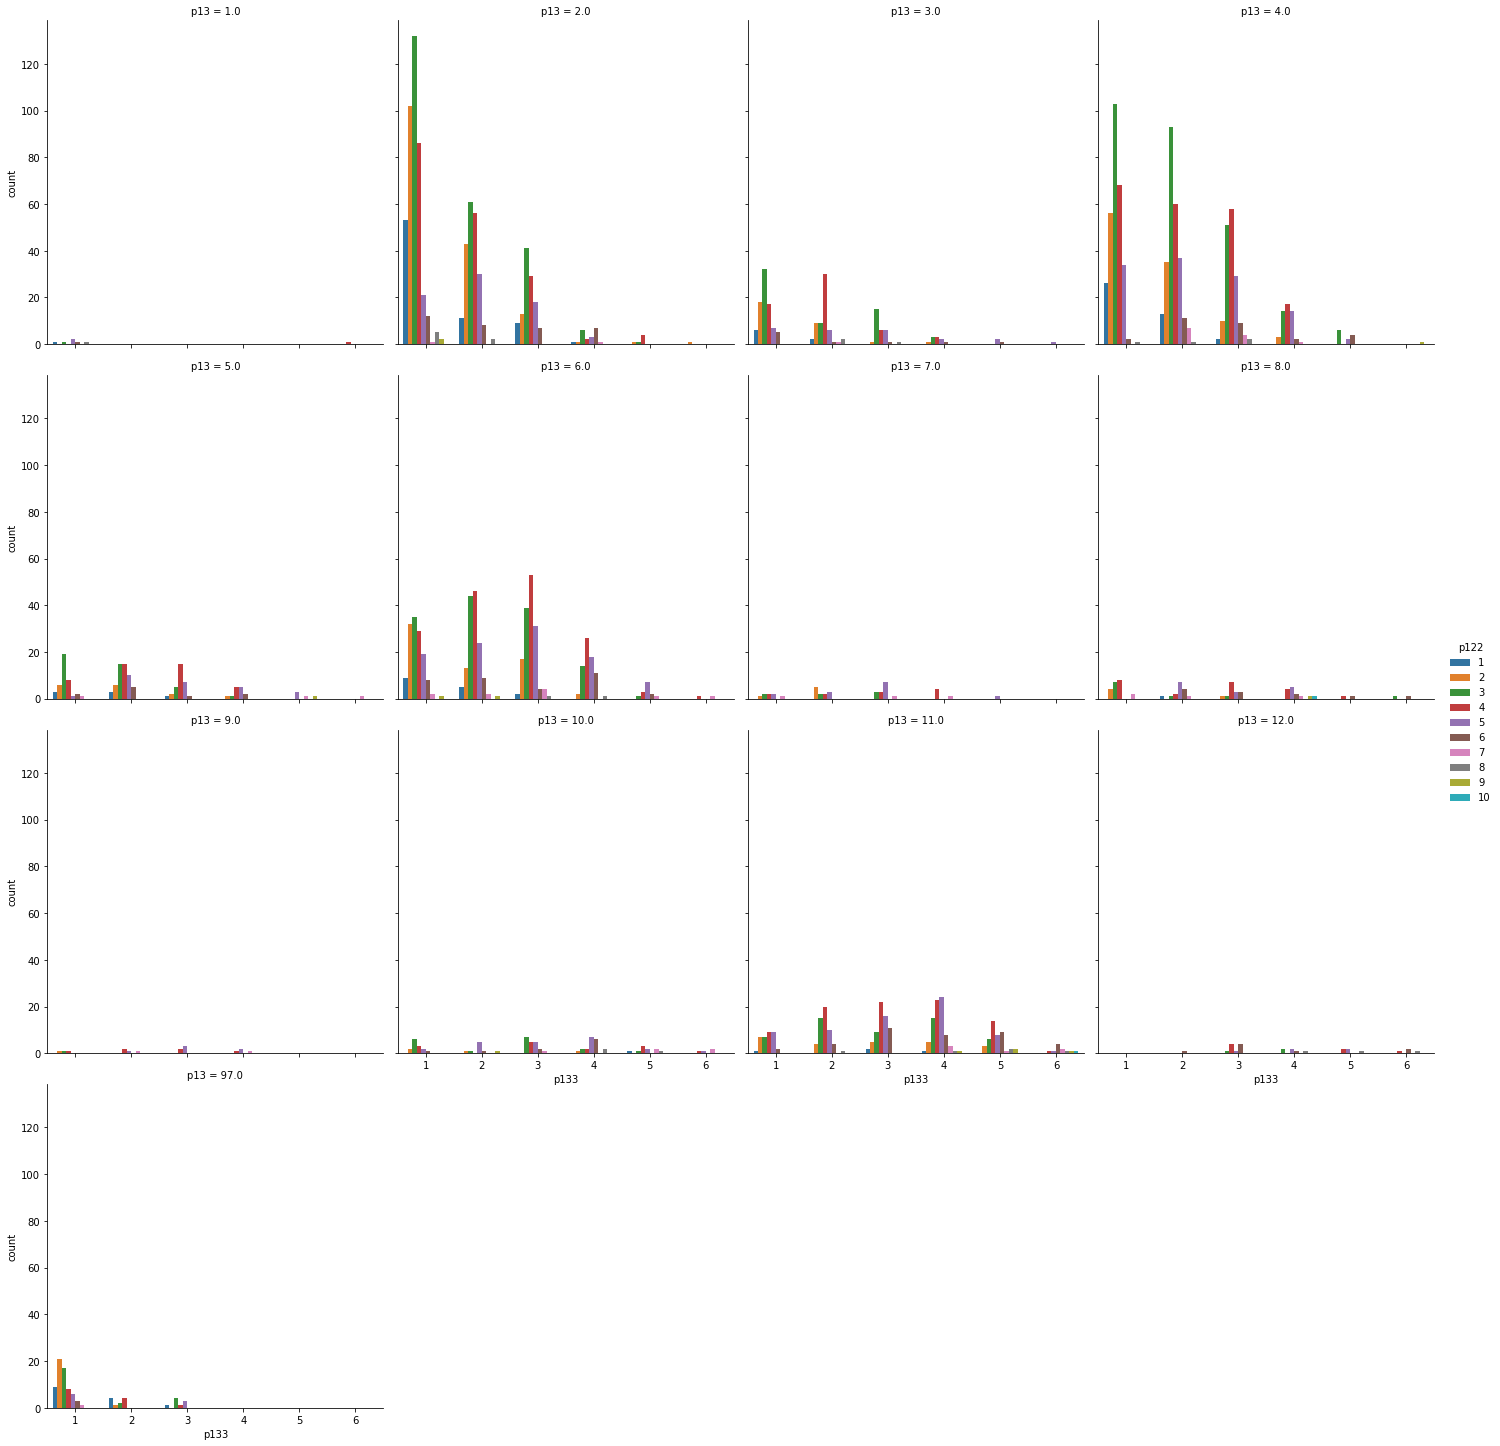

In [66]:
Mc = M.astype('category')
import seaborn as sns

sns.catplot(x = "p133",
            data = Mc,
            col="p13", 
            col_wrap=4,
           kind = 'count',
           hue = 'p122')
plt.show()

In [67]:
Mc.p13.cat.codes

7         2
13        9
23       10
26        1
28        1
         ..
17627     1
17629     1
17631     2
17633     3
17653     3
Length: 3010, dtype: int8

In [68]:
Mc.p13

7         3.0
13       10.0
23       11.0
26        2.0
28        2.0
         ... 
17627     2.0
17629     2.0
17631     3.0
17633     4.0
17653     4.0
Name: p13, Length: 3010, dtype: category
Categories (13, float64): [1.0, 2.0, 3.0, 4.0, ..., 10.0, 11.0, 12.0, 97.0]

In [69]:
codigos = Mc.p13.cat.codes
categorias = Mc.p13
mapa = dict(zip(codigos,categorias))
mapa

{2: 3.0,
 9: 10.0,
 10: 11.0,
 1: 2.0,
 6: 7.0,
 3: 4.0,
 4: 5.0,
 5: 6.0,
 7: 8.0,
 11: 12.0,
 12: 97.0,
 8: 9.0,
 0: 1.0}

In [70]:
a = StandardScaler().fit(M)
M_scaled = a.transform(M)
M_sca = pd.DataFrame(M_scaled)
M_sca.describe()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
count,3.010000e+03,3.010000e+03,3.010000e+03,3.010000e+03,3.010000e+03,3.010000e+03,3.010000e+03,3.010000e+03,3.010000e+03,3.010000e+03,...,3.010000e+03,3.010000e+03,3.010000e+03,3.010000e+03,3.010000e+03,3.010000e+03,3.010000e+03,3.010000e+03,3.010000e+03,3.010000e+03
mean,6.705600e-17,1.583672e-15,3.205114e-15,1.178146e-15,1.643462e-15,-1.311612e-16,-1.701066e-15,-1.516690e-16,2.397270e-15,3.677383e-16,...,2.397123e-16,9.867891e-16,3.595131e-16,-4.730251e-16,2.076597e-16,5.109423e-16,2.085449e-16,4.261357e-16,-3.061412e-17,1.306522e-15
std,1.000166e+00,1.000166e+00,1.000166e+00,1.000166e+00,1.000166e+00,1.000166e+00,1.000166e+00,1.000166e+00,1.000166e+00,1.000166e+00,...,1.000166e+00,1.000166e+00,1.000166e+00,1.000166e+00,1.000166e+00,1.000166e+00,1.000166e+00,1.000166e+00,1.000166e+00,1.000166e+00
min,-4.187076e-01,-2.488140e+00,-1.145163e+00,-1.845989e+00,-7.346033e-01,-2.889867e-01,-1.175132e-01,-3.412753e-01,-9.362471e-01,-3.080228e+00,...,-4.366539e+00,-6.091081e+00,-2.662968e+00,-4.596994e+00,-5.063316e+00,-5.183664e+00,-5.509462e+00,-1.013869e+01,-7.177844e-01,-9.940309e-01
25%,-3.542515e-01,-5.819803e-01,-1.145163e+00,-4.542729e-01,-7.346033e-01,-2.889867e-01,-1.175132e-01,-3.412753e-01,-9.362471e-01,3.246513e-01,...,2.290143e-01,1.641745e-01,3.755209e-01,2.175335e-01,1.974990e-01,1.929137e-01,1.815059e-01,9.863204e-02,-7.177844e-01,-9.940309e-01
50%,-2.253393e-01,-5.819803e-01,-7.667550e-02,2.415853e-01,-7.346033e-01,-2.889867e-01,-1.175132e-01,-3.412753e-01,-9.362471e-01,3.246513e-01,...,2.290143e-01,1.641745e-01,3.755209e-01,2.175335e-01,1.974990e-01,1.929137e-01,1.815059e-01,9.863204e-02,-7.177844e-01,-1.495395e-01
75%,-9.642716e-02,1.324179e+00,9.918119e-01,9.374435e-01,1.361279e+00,-2.889867e-01,-1.175132e-01,-3.412753e-01,1.068094e+00,3.246513e-01,...,2.290143e-01,1.641745e-01,3.755209e-01,2.175335e-01,1.974990e-01,1.929137e-01,1.815059e-01,9.863204e-02,8.123368e-01,6.949519e-01
max,5.769076e+00,1.324179e+00,6.334249e+00,4.416734e+00,1.361279e+00,3.460367e+00,8.509679e+00,2.930186e+00,1.068094e+00,3.246513e-01,...,2.290143e-01,1.641745e-01,3.755209e-01,2.175335e-01,1.974990e-01,1.929137e-01,1.815059e-01,9.863204e-02,5.402700e+00,3.228426e+00


In [ ]:
def histograma(ingresoc,c1,c2):
    a = df2[df2.p133 == ingresoc]
    L = [c1,c2]
    a[L].plot.hist()
    plt.show()
    
histograma(1,'p13','p131')
histograma(2,'p13','p131')
histograma(3,'p13','p131')
histograma(4,'p13','p131')
histograma(5,'p13','p131')
histograma(6,'p13','p131')
histograma(7,'p13','p131')
print(df2.p133.unique())

In [ ]:
import seaborn as sns

def filtro(ingresoc,c1,c2):
    a = df2[df2.p133 == ingresoc]
    L = [c1,c2]
    return a[L]

sns.pairplot(filtro(1,'p13','p131'))

# Selección de variables

In [71]:
X_train, X_test, y_train, y_test = train_test_split(pd.get_dummies(Xc), yc, test_size=0.2, random_state=0)
y_train=y_train.to_numpy().ravel()
y_test=y_test.to_numpy().ravel()

from sklearn.feature_selection import VarianceThreshold
# feature selection
def select_var(X_train, X_test,tres):
	fs = VarianceThreshold(threshold=(tres * (1 - tres)))
    #mutual_info_classif
    #chi2
	X_train_fs = fs.fit_transform(X_train)
	X_test_fs = fs.fit_transform(X_test)
	return X_train_fs, X_test_fs, fs


X_train_fs, X_test_fs, fs = select_var(X_train, X_test, 0.8)
print(X_train_fs.shape)
print(X_train.shape)
print(X_test_fs.shape)

logistica(X_train_fs, y_train, X_test_fs, y_test)
arbolbos(X_train_fs, y_train, X_test_fs, y_test)



(2408, 33)
(2408, 130)
(602, 33)


/Users/rafamtz/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Accuracy reg log multi: 46.35
Accuracy reg log ovr: 46.35
Accuracy bosque: 43.52
Accuracy arbol: 40.53


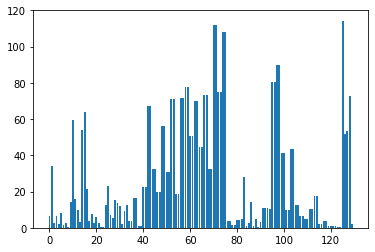

(2408, 60)
(2408, 130)
(602, 60)


/Users/rafamtz/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Accuracy reg log multi: 46.51
Accuracy reg log ovr: 46.68
Accuracy bosque: 45.35
Accuracy arbol: 35.38


In [72]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif

def select_uni(X_train,y_train, X_test,i,k):
    
    metodo = (chi2, mutual_info_classif, f_classif)
    fs = SelectKBest(score_func= metodo[i], k=k)
    #mutual_info_classif
    #chi2
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
    plt.show()
    return X_train_fs, X_test_fs, fs


X_train_fs, X_test_fs, fs = select_uni(X_train, y_train, X_test, 2, 60)
print(X_train_fs.shape)
print(X_train.shape)
print(X_test_fs.shape)

logistica(X_train_fs, y_train, X_test_fs, y_test)
arbolbos(X_train_fs, y_train, X_test_fs, y_test)

## Eliminacion recursiva


In [73]:
from sklearn.feature_selection import RFE

estimator = SVC(kernel="linear")
selector = RFE(estimator, n_features_to_select=None, step=1)
selector = selector.fit(X_train, y_train)
#selector.support_


#selector.ranking_

X_train_fs = selector.transform(X_train)
X_test_fs = selector.transform(X_test)

logistica(X_train_fs, y_train, X_test_fs, y_test)
arbolbos(X_train_fs, y_train, X_test_fs, y_test)

/Users/rafamtz/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Accuracy reg log multi: 44.52
Accuracy reg log ovr: 44.52
Accuracy bosque: 44.68
Accuracy arbol: 38.70
